

**Architecture Description of MobileNetV2:**

MobileNetV2 is a lightweight convolutional neural network architecture designed primarily for resource-constrained devices such as mobile or embedded platforms. The key concepts behind MobileNetV2 include:

1. **Depthwise-Separable Convolutions**:  
   - Traditional convolutions are factorized into two steps: 
     1. *Depthwise Convolution:* A convolution that applies a single filter per input channel, drastically reducing computation.
     2. *Pointwise Convolution:* A 1x1 convolution to linearly combine the outputs of the depthwise convolution, adjusting the number of output channels.
   - This separation significantly reduces both computation and model size.

2. **Inverted Residual Blocks with Linear Bottlenecks**:  
   Instead of using a wide-to-narrow residual block structure (like in standard residual blocks), MobileNetV2 uses *inverted residuals*. Each block expands the input channels using a pointwise convolution, applies a depthwise convolution, and then projects back to a lower-dimensional feature space with another pointwise convolution. This sequence:
   - Expands the number of channels (bottleneck expansion),
   - Applies a depthwise convolution for spatial filtering,
   - Projects back to fewer channels, preserving representational power with fewer parameters.
   
   During this process, a residual connection is maintained between the inputs and outputs of the block whenever possible, ensuring efficient gradient flow.

3. **Overall Structure**:  
   The network starts with a standard convolution, followed by a series of inverted residual blocks that progressively transform and downsample the input. Finally, a global average pooling layer is applied, followed by a linear (fully connected) layer for classification into the 1000 ImageNet classes.

**Preprocessing Steps Required t preprocessing pipeline:

1. **Resize**: Resize the input image so that the shorter side is at least 224 pixels.
2. **Center Crop**: Crop the image to an exact size of 224x224 pixels.
3. **Convert to Tensor**: Convert the PIL image to a PyTorch Tensor (shape: C x H x W).
4. **Normalize**: Normalize the tensor using the ImageNet mean and standard deviation:
   - Mean: `[0.485, 0.456, 0.406]`
   -data that the model was trained on.

**Input and Output Dimensions:**

- **Input Dimensions:** The model expects input images of size `(N, 3, 224, 224)`, where:
  - `N` = batch size
  - `3` = number of color channels (RGB)
  - `224, 224` = height and width of the image.

- **Output Dimensions:** The model outputs class probabilities for 1000 ImageNet classes. Thus, for each input image, the output is of shape `(N, 1000)`, where each element corresponds to the predicted probability of that class.


In [1]:
import torch
import torchvision
from torchvision import models, transforms
from PIL import Image
import urllib.request
import os

# URL of a banana image from Wikimedia Commons
image_url = "https://upload.wikimedia.org/wikipedia/commons/4/4c/Bananas.jpg"
image_filename = "banana.jpg"

# Download the image if it doesn't already exist
if not os.path.exists(image_filename):
    urllib.request.urlretrieve(image_url, image_filename)

# Load the pre-trained MobileNetV2 model
model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)
model.eval()

# Define preprocessing steps:
# 1. Resize shortest side to 256
# 2. Center crop to 224x224
# 3. Convert to Tensor
# 4. Normalize with ImageNet mean & std
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Preprocess the image
img = Image.open(image_filename).convert('RGB')
input_tensor = preprocess(img)
input_batch = input_tensor.unsqueeze(0)  # (1, 3, 224, 224)

# Inference
with torch.no_grad():
    output = model(input_batch)

# Convert output logits to probabilities
probabilities = torch.nn.functional.softmax(output[0], dim=0)

# Download imagenet_classes.txt if it doesn't exist
imagenet_filename = "imagenet_classes.txt"
imagenet_url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
if not os.path.exists(imagenet_filename):
    urllib.request.urlretrieve(imagenet_url, imagenet_filename)

# Load ImageNet class names
with open(imagenet_filename) as f:
    imagenet_labels = [line.strip() for line in f.readlines()]

# Get top 3 predictions
top3_prob, top3_catid = torch.topk(probabilities, 3)
print("Top 3 Predictions:")
for i in range(top3_catid.size(0)):
    print(f"{imagenet_labels[top3_catid[i]]}: {top3_prob[i].item():.4f}")


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 187MB/s]


Top 3 Predictions:
banana: 1.0000
pineapple: 0.0000
grocery store: 0.0000


100%|██████████| 344862509/344862509 [00:01<00:00, 238156410.46it/s]


Extracting flowers/flowers-102/102flowers.tgz to flowers/flowers-102


100%|██████████| 502/502 [00:00<00:00, 384433.19it/s]


100%|██████████| 14989/14989 [00:00<00:00, 7687505.83it/s]


Epoch [1/20] | Train Loss: 4.4664, Train Acc: 10.29% | Val Loss: 3.3234, Val Acc: 38.82%
Epoch [2/20] | Train Loss: 2.4764, Train Acc: 64.22% | Val Loss: 2.1796, Val Acc: 67.35%
Epoch [3/20] | Train Loss: 1.4586, Train Acc: 86.37% | Val Loss: 1.5873, Val Acc: 76.86%
Epoch [4/20] | Train Loss: 0.9072, Train Acc: 93.14% | Val Loss: 1.2752, Val Acc: 80.98%
Epoch [5/20] | Train Loss: 0.6448, Train Acc: 96.37% | Val Loss: 1.0692, Val Acc: 83.14%
Epoch [6/20] | Train Loss: 0.4633, Train Acc: 98.53% | Val Loss: 0.9569, Val Acc: 83.92%
Epoch [7/20] | Train Loss: 0.3535, Train Acc: 98.43% | Val Loss: 0.8804, Val Acc: 84.02%
Epoch [8/20] | Train Loss: 0.2697, Train Acc: 99.41% | Val Loss: 0.8303, Val Acc: 84.41%
Epoch [9/20] | Train Loss: 0.2298, Train Acc: 99.51% | Val Loss: 0.7804, Val Acc: 84.71%
Epoch [10/20] | Train Loss: 0.1882, Train Acc: 99.90% | Val Loss: 0.7494, Val Acc: 85.59%
Epoch [11/20] | Train Loss: 0.1556, Train Acc: 99.71% | Val Loss: 0.7129, Val Acc: 85.69%
Epoch [12/20] | Tra

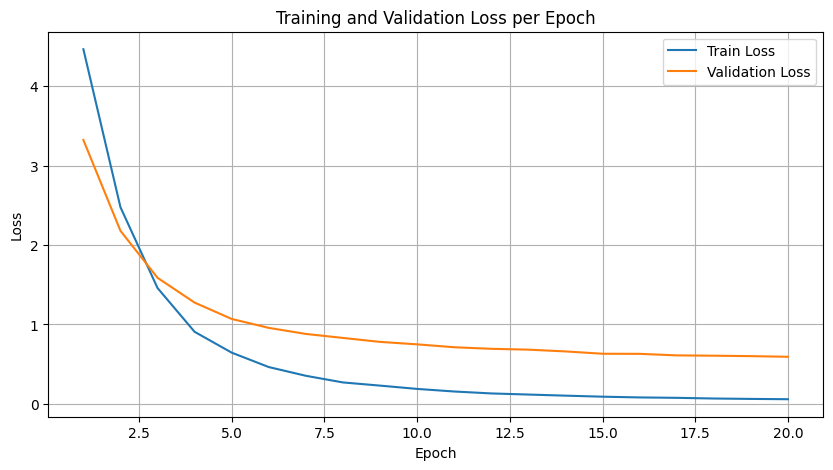

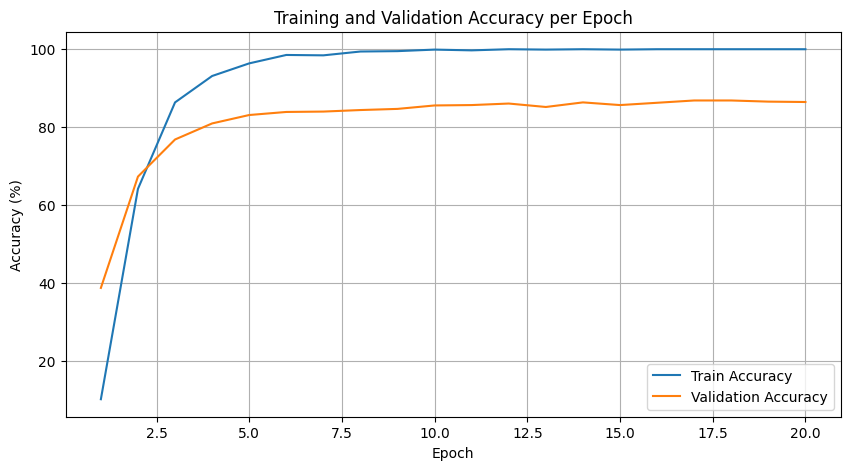

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import time
import matplotlib.pyplot as plt
import numpy as np

# Device configuration (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
batch_size = 32
num_epochs = 20
learning_rate = 0.001

# Data transforms suitable for MobileNetV2 (224x224 input size)
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])
}

# Load the Oxford 102 Flowers dataset
train_dataset = datasets.Flowers102(root='flowers', split='train', download=True, transform=data_transforms['train'])
val_dataset = datasets.Flowers102(root='flowers', split='val', download=True, transform=data_transforms['val'])
test_dataset = datasets.Flowers102(root='flowers', split='test', download=True, transform=data_transforms['test'])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Load the pre-trained MobileNetV2 model
feature_extractor = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)

# Freeze all feature extraction layers
for param in feature_extractor.features.parameters():
    param.requires_grad = False

# Replace the classifier with a new one for 102 classes
in_features = feature_extractor.classifier[1].in_features
feature_extractor.classifier = nn.Sequential(
    nn.Dropout(p=0.2),
    nn.Linear(in_features, 102)
)

model = feature_extractor.to(device)

# Define the loss function and optimizer (train only the classifier parameters)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=learning_rate)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Accumulate training statistics
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    avg_train_loss = running_loss / total
    train_accuracy = 100.0 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
    
    avg_val_loss = val_loss / total_val
    val_accuracy = 100.0 * correct_val / total_val
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}% | "
          f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

# Evaluate on the test set after training completes
model.eval()
test_loss = 0.0
correct_test = 0
total_test = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

avg_test_loss = test_loss / total_test
test_accuracy = 100.0 * correct_test / total_test

print("\nFinal Results:")
print(f"Training Loss: {train_losses[-1]:.4f}, Training Acc: {train_accuracies[-1]:.2f}%")
print(f"Validation Loss: {val_losses[-1]:.4f}, Validation Acc: {val_accuracies[-1]:.2f}%")
print(f"Test Loss: {avg_test_loss:.4f}, Test Acc: {test_accuracy:.2f}%")

# Plot Loss per Epoch for Training and Validation
plt.figure(figsize=(10,5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy per Epoch for Training and Validation
plt.figure(figsize=(10,5))
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()



--- Running experiment with mobilenet_v2 ---
mobilenet_v2 -> Total params: 2354534, Trainable params: 130662
Epoch [1/20] | Train Loss: 4.4216, Train Acc: 11.86% | Val Loss: 3.2637, Val Acc: 42.84%
Epoch [2/20] | Train Loss: 2.4676, Train Acc: 63.73% | Val Loss: 2.1516, Val Acc: 70.29%
Epoch [3/20] | Train Loss: 1.4010, Train Acc: 88.63% | Val Loss: 1.5728, Val Acc: 78.14%
Epoch [4/20] | Train Loss: 0.9038, Train Acc: 94.22% | Val Loss: 1.2595, Val Acc: 80.88%
Epoch [5/20] | Train Loss: 0.6225, Train Acc: 96.57% | Val Loss: 1.0836, Val Acc: 82.16%
Epoch [6/20] | Train Loss: 0.4552, Train Acc: 98.24% | Val Loss: 0.9605, Val Acc: 83.33%
Epoch [7/20] | Train Loss: 0.3526, Train Acc: 98.92% | Val Loss: 0.8873, Val Acc: 83.92%
Epoch [8/20] | Train Loss: 0.2631, Train Acc: 99.22% | Val Loss: 0.8143, Val Acc: 85.29%
Epoch [9/20] | Train Loss: 0.2191, Train Acc: 99.61% | Val Loss: 0.7788, Val Acc: 85.69%
Epoch [10/20] | Train Loss: 0.1811, Train Acc: 99.80% | Val Loss: 0.7345, Val Acc: 85.00%

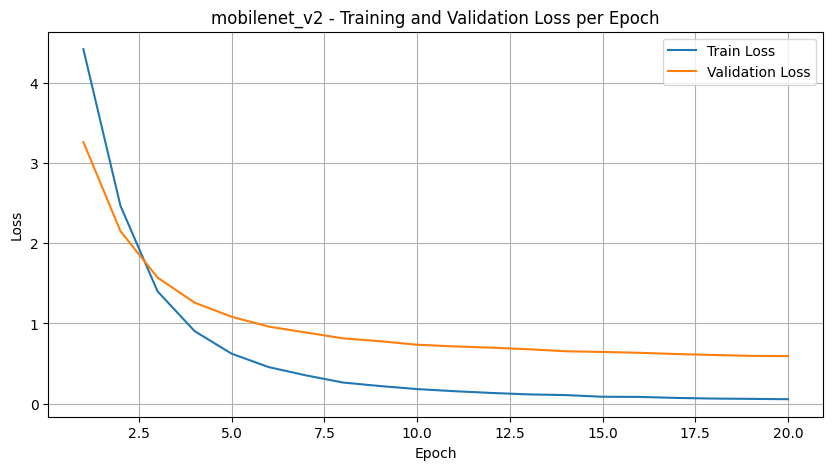

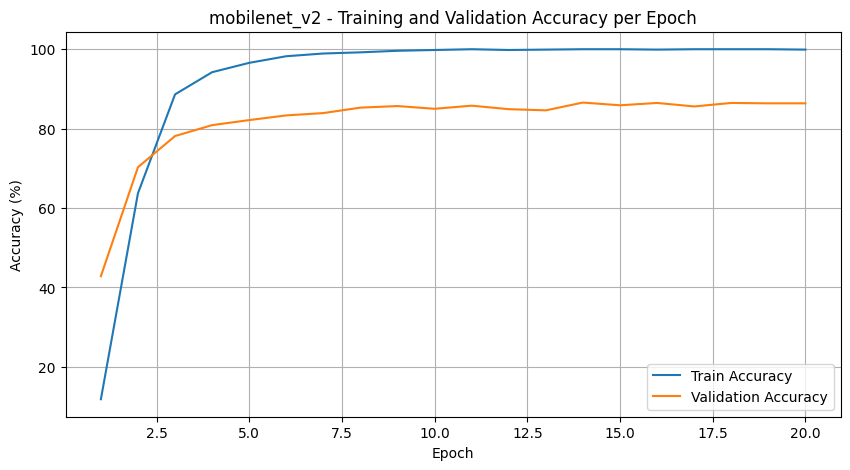


--- Running experiment with resnet50 ---


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 224MB/s]


resnet50 -> Total params: 23717030, Trainable params: 208998
Epoch [1/20] | Train Loss: 4.3697, Train Acc: 13.04% | Val Loss: 3.8043, Val Acc: 57.25%
Epoch [2/20] | Train Loss: 3.1616, Train Acc: 85.20% | Val Loss: 3.1188, Val Acc: 74.02%
Epoch [3/20] | Train Loss: 2.2920, Train Acc: 96.37% | Val Loss: 2.5860, Val Acc: 77.35%
Epoch [4/20] | Train Loss: 1.6630, Train Acc: 97.84% | Val Loss: 2.2233, Val Acc: 79.41%
Epoch [5/20] | Train Loss: 1.2258, Train Acc: 99.31% | Val Loss: 1.8959, Val Acc: 80.29%
Epoch [6/20] | Train Loss: 0.9095, Train Acc: 99.90% | Val Loss: 1.6933, Val Acc: 81.08%
Epoch [7/20] | Train Loss: 0.7142, Train Acc: 100.00% | Val Loss: 1.5685, Val Acc: 81.96%
Epoch [8/20] | Train Loss: 0.5543, Train Acc: 99.71% | Val Loss: 1.4307, Val Acc: 82.55%
Epoch [9/20] | Train Loss: 0.4578, Train Acc: 99.80% | Val Loss: 1.3767, Val Acc: 83.24%
Epoch [10/20] | Train Loss: 0.3729, Train Acc: 99.90% | Val Loss: 1.2769, Val Acc: 83.43%
Epoch [11/20] | Train Loss: 0.3258, Train Acc: 

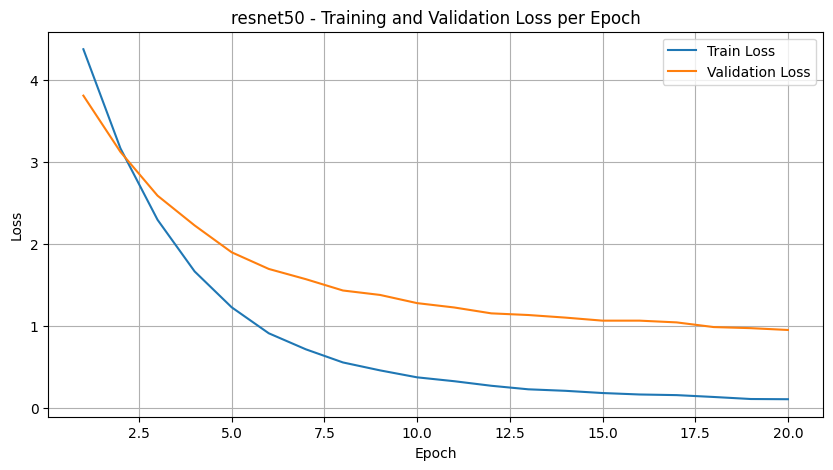

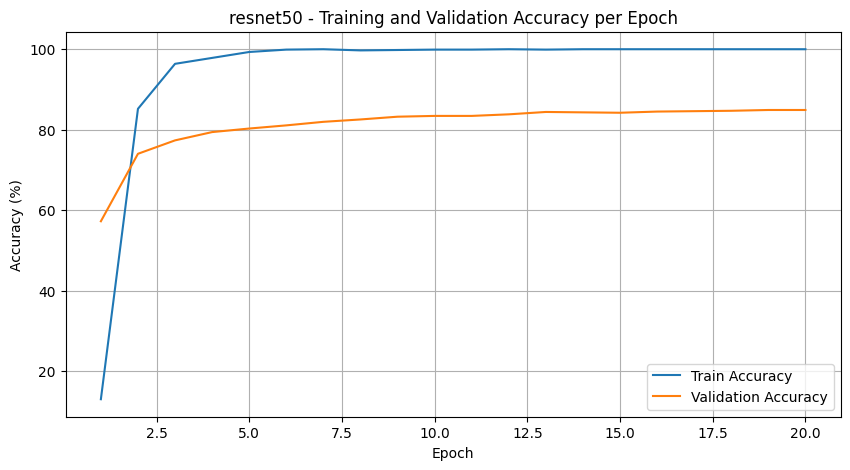


--- Running experiment with vgg16 ---


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 203MB/s] 


vgg16 -> Total params: 134678438, Trainable params: 119963750
Epoch [1/20] | Train Loss: 4.6426, Train Acc: 5.59% | Val Loss: 3.7985, Val Acc: 16.27%
Epoch [2/20] | Train Loss: 3.4275, Train Acc: 21.67% | Val Loss: 2.5762, Val Acc: 38.04%
Epoch [3/20] | Train Loss: 2.2935, Train Acc: 43.43% | Val Loss: 1.8633, Val Acc: 52.06%
Epoch [4/20] | Train Loss: 1.4598, Train Acc: 60.49% | Val Loss: 1.5841, Val Acc: 60.00%
Epoch [5/20] | Train Loss: 1.0946, Train Acc: 71.86% | Val Loss: 1.4835, Val Acc: 63.73%
Epoch [6/20] | Train Loss: 0.7787, Train Acc: 79.80% | Val Loss: 1.7845, Val Acc: 58.24%
Epoch [7/20] | Train Loss: 0.7394, Train Acc: 82.35% | Val Loss: 1.7684, Val Acc: 59.61%
Epoch [8/20] | Train Loss: 0.7909, Train Acc: 84.22% | Val Loss: 2.0535, Val Acc: 57.45%
Epoch [9/20] | Train Loss: 0.7548, Train Acc: 84.71% | Val Loss: 2.1448, Val Acc: 60.69%
Epoch [10/20] | Train Loss: 0.8333, Train Acc: 84.80% | Val Loss: 2.0801, Val Acc: 62.06%
Epoch [11/20] | Train Loss: 0.6567, Train Acc: 8

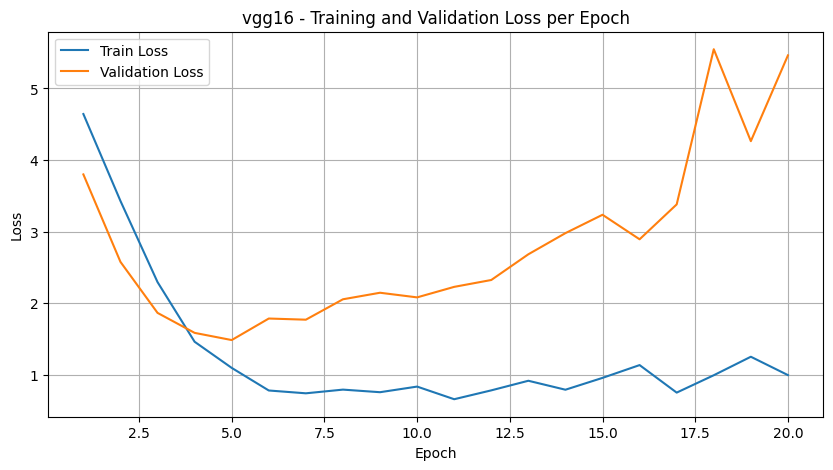

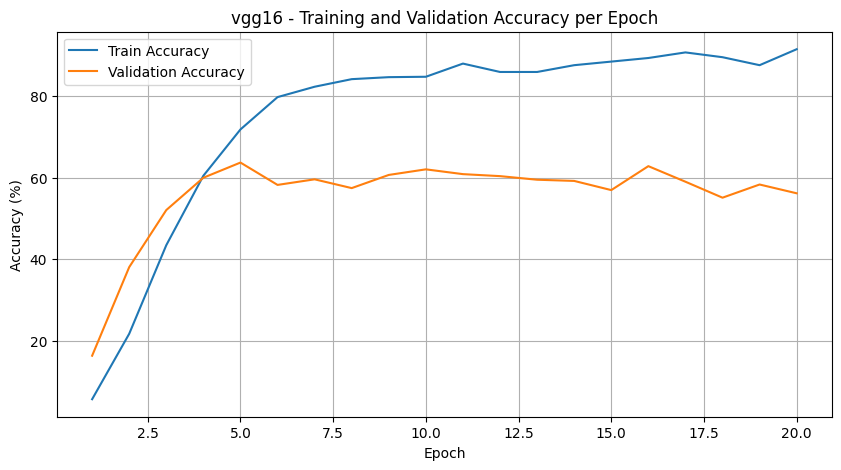


Comparison of Results:
Model: mobilenet_v2
  Total Params: 2354534, Trainable Params: 130662
  Final Train Acc: 99.90%
  Final Val Acc: 86.37%
  Test Acc: 84.89%
--------------------------------------------------
Model: resnet50
  Total Params: 23717030, Trainable Params: 208998
  Final Train Acc: 100.00%
  Final Val Acc: 84.90%
  Test Acc: 82.11%
--------------------------------------------------
Model: vgg16
  Total Params: 134678438, Trainable Params: 119963750
  Final Train Acc: 91.57%
  Final Val Acc: 56.18%
  Test Acc: 59.96%
--------------------------------------------------


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import copy

# Device configuration (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
batch_size = 32
num_epochs = 20
learning_rate = 0.001

# Data transforms suitable for input size 224x224 (used by all three models)
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])
}

# Load the Oxford 102 Flowers dataset
train_dataset = datasets.Flowers102(root='flowers', split='train', download=True, transform=data_transforms['train'])
val_dataset = datasets.Flowers102(root='flowers', split='val', download=True, transform=data_transforms['val'])
test_dataset = datasets.Flowers102(root='flowers', split='test', download=True, transform=data_transforms['test'])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)


def get_model(model_name):
    """
    Given a model name, load a pretrained model, freeze its feature extraction layers, 
    and modify the classifier for 102 classes.
    """
    if model_name == 'mobilenet_v2':
        model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)
        # Freeze feature extraction
        for param in model.features.parameters():
            param.requires_grad = False
        # Replace classifier
        in_features = model.classifier[1].in_features
        model.classifier = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(in_features, 102)
        )
    
    elif model_name == 'resnet50':
        model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
        # Freeze all layers except the final fully connected
        for param in model.parameters():
            param.requires_grad = False
        # Replace the final fc layer
        in_features = model.fc.in_features
        model.fc = nn.Linear(in_features, 102)
        
    elif model_name == 'vgg16':
        model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
        # Freeze feature extraction layers
        for param in model.features.parameters():
            param.requires_grad = False
        # Replace classifier
        # VGG16 classifier is usually model.classifier: [Linear(25088->4096), ReLU, Dropout, Linear(4096->4096), ReLU, Dropout, Linear(4096->1000)]
        # We will replace the last layer with 102 outputs.
        in_features = model.classifier[6].in_features
        # Modify classifier keeping original architecture but last layer changed
        model.classifier[6] = nn.Linear(in_features, 102)
    else:
        raise ValueError("Unsupported model name.")
    
    return model.to(device)


def count_parameters(model):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params, trainable_params


def train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    """
    Train and evaluate the model on train and validation sets.
    Returns training and validation losses and accuracies.
    """
    best_model_wts = copy.deepcopy(model.state_dict())
    best_val_acc = 0.0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        avg_train_loss = running_loss / total
        train_accuracy = 100.0 * correct / total
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
        
        avg_val_loss = val_loss / total_val
        val_accuracy = 100.0 * correct_val / total_val
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)
        
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            best_model_wts = copy.deepcopy(model.state_dict())
        
        print(f"Epoch [{epoch+1}/{num_epochs}] | "
              f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}% | "
              f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")
    
    # Load best weights
    model.load_state_dict(best_model_wts)
    
    return model, train_losses, val_losses, train_accuracies, val_accuracies


def test_model(model, test_loader, criterion):
    """
    Evaluate the model on the test set and return loss and accuracy.
    """
    model.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    avg_test_loss = test_loss / total_test
    test_accuracy = 100.0 * correct_test / total_test
    return avg_test_loss, test_accuracy


def run_experiment(model_name):
    """
    Runs the full training and evaluation pipeline for a given model name.
    Returns training, validation and test metrics, as well as parameter counts.
    """
    print(f"\n--- Running experiment with {model_name} ---")
    model = get_model(model_name)
    total_params, trainable_params = count_parameters(model)
    print(f"{model_name} -> Total params: {total_params}, Trainable params: {trainable_params}")

    criterion = nn.CrossEntropyLoss()
    # Only parameters that require grad will be optimized (classifier layers)
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)

    model, train_losses, val_losses, train_accuracies, val_accuracies = train_and_evaluate(
        model, train_loader, val_loader, criterion, optimizer, num_epochs
    )
    test_loss, test_accuracy = test_model(model, test_loader, criterion)
    
    print("\nFinal Results for", model_name)
    print(f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.2f}%")
    print(f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.2f}%")
    print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.2f}%")

    return {
        'model_name': model_name,
        'train_loss': train_losses[-1],
        'train_acc': train_accuracies[-1],
        'val_loss': val_losses[-1],
        'val_acc': val_accuracies[-1],
        'test_loss': test_loss,
        'test_acc': test_accuracy,
        'total_params': total_params,
        'trainable_params': trainable_params
    }, (train_losses, val_losses, train_accuracies, val_accuracies)


# Run experiments for MobileNetV2, ResNet50, and VGG16
models_to_test = ['mobilenet_v2', 'resnet50', 'vgg16']
results = {}

for mname in models_to_test:
    res, curves = run_experiment(mname)
    results[mname] = res
    train_losses, val_losses, train_accuracies, val_accuracies = curves
    
    # Plot Loss per Epoch
    plt.figure(figsize=(10,5))
    plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{mname} - Training and Validation Loss per Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot Accuracy per Epoch
    plt.figure(figsize=(10,5))
    plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title(f'{mname} - Training and Validation Accuracy per Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

# Compare results
print("\nComparison of Results:")
for mname in models_to_test:
    r = results[mname]
    print(f"Model: {mname}")
    print(f"  Total Params: {r['total_params']}, Trainable Params: {r['trainable_params']}")
    print(f"  Final Train Acc: {r['train_acc']:.2f}%")
    print(f"  Final Val Acc: {r['val_acc']:.2f}%")
    print(f"  Test Acc: {r['test_acc']:.2f}%")
    print("--------------------------------------------------")



## Performance Analysis of CNN Models for Oxford 102 Flowers Dataset

The analysis evaluates the performance of three CNN architectures—**MobileNetV2**, **ResNet50**, and **VGG16**—on the Oxford 102 Flowers dataset, based on their parameter counts, trainable parameters, and results across training, validation, and testing phases.

---

### **1. MobileNetV2**
- **Parameters**: Total: ~2.35 million, Trainable: ~130k.
- **Final Performance**:
  - **Train Accuracy**: 99.90%
  - **Validation Accuracy**: 86.37%
  - **Test Accuracy**: 84.89%
- **Training Dynamics**:
  - Early convergence with substantial improvement over the first few epochs.
  - Achieved stable validation accuracy by epoch 14.
- **Rationale**:
  - MobileNetV2’s lightweight and efficient architecture ensures minimal overfitting and enables fast, stable training. Despite having the smallest parameter count, it consistently outperformed in validation and test accuracy due to its adaptability and efficient feature extraction.

---

### **2. ResNet50**
- **Parameters**: Total: ~23.7 million, Trainable: ~209k.
- **Final Performance**:
  - **Train Accuracy**: 100.00%
  - **Validation Accuracy**: 84.90%
  - **Test Accuracy**: 82.11%
- **Training Dynamics**:
  - Demonstrated smooth learning progression with validation accuracy peaking at ~84.90%.
  - Slightly higher trainable parameter count compared to MobileNetV2, but lower test accuracy suggests suboptimal adaptation to the dataset under current fine-tuning settings.
- **Rationale**:
  - While ResNet50’s deep residual architecture facilitates strong feature extraction, its higher parameter count likely reduced efficiency, impacting its ability to generalize effectively for this task.

---

### **3. VGG16**
- **Parameters**: Total: ~134.7 million, Trainable: ~120 million.
- **Final Performance**:
  - **Train Accuracy**: 91.57%
  - **Validation Accuracy**: 56.18%
  - **Test Accuracy**: 59.96%
- **Training Dynamics**:
  - Rapidly diverged during training, with validation loss increasing after epoch 6.
  - Poor generalization observed due to a disproportionately large number of trainable parameters, making optimization challenging with limited data and epochs.
- **Rationale**:
  - VGG16's large size resulted in overfitting and hindered effective transfer learning. Despite its robust architecture, it was unable to leverage pre-trained features efficiently under the given conditions.

---

### **Comparison and Key Insights**
1. **Model Efficiency vs. Complexity**:
   - **MobileNetV2** demonstrated that smaller models with fewer trainable parameters can outperform deeper architectures in transfer learning scenarios, achieving the highest test accuracy (84.89%).
   - Larger models like **VGG16**, despite their complexity, performed poorly due to inefficiencies in adapting to the dataset.

2. **Adaptability and Training Dynamics**:
   - MobileNetV2’s compact design and efficient parameter usage allowed for rapid convergence and robust performance.
   - ResNet50 exhibited good performance but struggled to match MobileNetV2 in efficiency and adaptability.
   - VGG16’s performance was significantly hindered by its large parameter count and resulting overfitting.

3. **Optimal Transfer Learning**:
   - The results emphasize the importance of selecting architectures that balance parameter count with the ability to generalize efficiently.
   - Lightweight models like MobileNetV2 are particularly well-suited for tang the best balance between performance and resource utilization.ansfer learning tasks.

Epoch 1/40, Train Loss: 4.8890, Train Acc: 1.67%, Val Loss: 4.9364, Val Acc: 0.98%
Epoch 2/40, Train Loss: 4.4885, Train Acc: 2.55%, Val Loss: 5.1510, Val Acc: 0.98%
Epoch 3/40, Train Loss: 4.1149, Train Acc: 5.98%, Val Loss: 4.6750, Val Acc: 6.86%
Epoch 4/40, Train Loss: 3.8108, Train Acc: 9.41%, Val Loss: 4.3076, Val Acc: 8.24%
Epoch 5/40, Train Loss: 3.5823, Train Acc: 12.06%, Val Loss: 5.0492, Val Acc: 6.76%
Epoch 6/40, Train Loss: 3.3666, Train Acc: 14.02%, Val Loss: 4.1656, Val Acc: 8.43%
Epoch 7/40, Train Loss: 3.2384, Train Acc: 16.96%, Val Loss: 3.5958, Val Acc: 13.63%
Epoch 8/40, Train Loss: 3.0089, Train Acc: 18.63%, Val Loss: 4.4753, Val Acc: 12.75%
Epoch 9/40, Train Loss: 2.8366, Train Acc: 22.94%, Val Loss: 3.5015, Val Acc: 17.65%
Epoch 10/40, Train Loss: 2.6415, Train Acc: 28.82%, Val Loss: 3.4735, Val Acc: 16.27%
Epoch 11/40, Train Loss: 2.4724, Train Acc: 33.33%, Val Loss: 4.4337, Val Acc: 14.02%
Epoch 12/40, Train Loss: 2.4663, Train Acc: 31.47%, Val Loss: 3.6208, Val

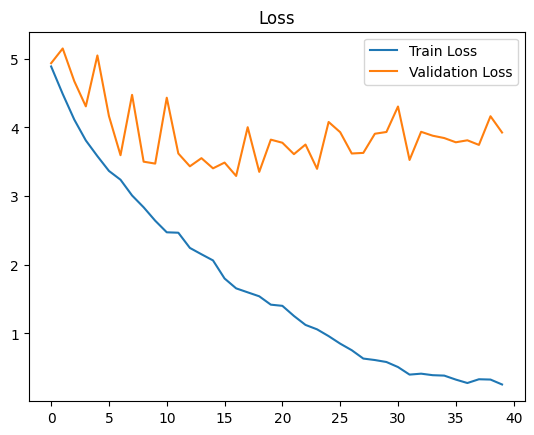

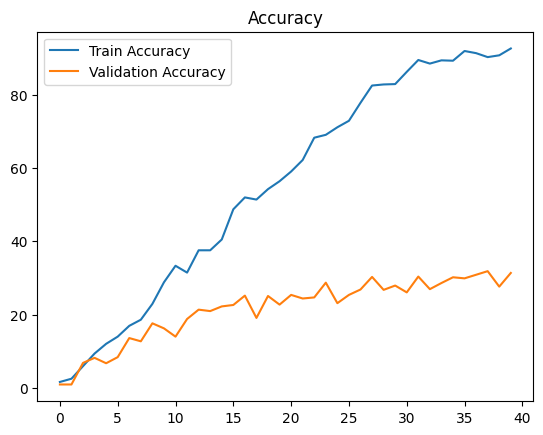

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import time

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
batch_size = 32
num_epochs = 40
learning_rate = 0.001

# Data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Load the Oxford 102 Flowers dataset
train_dataset = datasets.Flowers102(root='flowers', split='train', download=True, transform=data_transforms['train'])
val_dataset = datasets.Flowers102(root='flowers', split='val', download=True, transform=data_transforms['val'])
test_dataset = datasets.Flowers102(root='flowers', split='test', download=True, transform=data_transforms['test'])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Define the MobileNetV2 model with random weights
model = models.mobilenet_v2(weights=None)  # Initialize with random weights
model.classifier = nn.Sequential(
    nn.Dropout(0.2),
    nn.Linear(model.last_channel, 102)  # 102 classes for Oxford Flowers dataset
)
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training and validation
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss, correct, total = 0.0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_losses.append(train_loss / total)
    train_accuracies.append(100 * correct / total)

    model.eval()
    val_loss, correct_val, total_val = 0.0, 0, 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    val_losses.append(val_loss / total_val)
    val_accuracies.append(100 * correct_val / total_val)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.2f}%, "
          f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.2f}%")

# Test the model
model.eval()
test_loss, correct_test, total_test = 0.0, 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        total_test += labels.size(0)
        correct_test += predicted.eq(labels).sum().item()

test_accuracy = 100 * correct_test / total_test
print(f"Test Loss: {test_loss / total_test:.4f}, Test Accuracy: {test_accuracy:.2f}%")

# Plotting results
plt.figure()
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

plt.figure()
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()


### I used 40 epochs for random weights in comparison to Pre-Trained model(20 epochs) to get highest Accuracy 



#### **1. Random Weights Initialization**
- **Training Progress**:
  - Initially, the model struggles to learn, with **very low training and validation accuracy** in the early epochs (1-5).
  - Significant training effort is required: **40 epochs were needed to reach the highest accuracy**, with training accuracy reaching **92.55%** and validation accuracy only **31.37%** by the final epoch.
  - The validation performance indicates **limited generalization** and overfitting, as the training accuracy is high but validation accuracy stagates.

- **Final Test Performance**:
  - **Test Accuracy**: 27.24%.
  - **Test Loss**: 4.2845.
  - Even after 40 epochs, the model fails to generalize well to .serRandom weight initialization requires significantly more training time (**40 epochs**) to reach its peak performance compared to pre-trained models (**20 epochs**)ak performance.
  - The model shows poor generalization, likely due to the absence of pre-learned features and the burden of learning all feature representation fro scratch.

---

#### **2. Pre-trained Weights with Freezing**
- **Training Progress**:
  - The model achieves rapid improvement in both training and validation accuracy within the first few epochs.
  - Validation accuracy surpasses **38.82% by epoch 1** and reaches **86.86% by epoch 17**.
  - Only **20 epochs** are needed to achieve high performance, wiminimal overfitting.
  
- **Final Test Performance**:
  - **Test Accuracy**: 85.25%.
  The use of pre-trained weights allows the model to generalize effectively to unseen data with far less training effort than training effort comparon.

- **Key Observations**:
  - Pre-trained weights significantly enhance learning efficiency by reducing the required training epochs by half (**20 epochs vs. 40 epochs**).
  - By leveraging pre-learned features, the model avoids overfitting and adapts oCted datasets.

---

### **Conclusion**
This comparison highlights the superiority of **transfer learning with pre-trained models** over training from scratch using random weights. By leveraging pre-trained features, the model not only achieved better generalization but also required **half the training time (20 epochs vs. 40 epochended for achieving optimal performance efficiently.